1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

This dataset contains information about credit applicants, including demographic, financial, and contact-related data. It is designed for use in building predictive models to detect credit fraud or assess credit risk.

Each row represents a unique applicant, and the target variable indicates whether the applicant is likely to default or be involved in fraudulent activity.

| Column Name         | Description                                                                                                      |
| ------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **ID**              | Unique identifier for each applicant.                                                                           |
| **GENDER**          | Gender of the applicant (e.g., Male, Female).                                                                   |
| **CAR**             | Indicates whether the applicant owns a car (Yes/No).                                                            |
| **REALITY**         | Indicates whether the applicant owns real estate property (Yes/No).                                             |
| **NO_OF_CHILD**     | Number of children the applicant has.                                                                           |
| **INCOME**          | Applicant’s monthly income (in local currency).                                                                 |
| **INCOME_TYPE**     | Type of income source (e.g., Working, Pensioner, Student).                                                      |
| **EDUCATION_TYPE**  | Level of education (e.g., Secondary, Higher Education, Incomplete Higher).                                     |
| **FAMILY_TYPE**     | Type of family structure (e.g., Married, Single, Civil Marriage).                                               |
| **HOUSE_TYPE**      | Type of housing the applicant lives in (e.g., House, Apartment, Municipal).                                     |
| **FLAG_MOBIL**      | Indicator if the applicant has a mobile phone (1 = Yes, 0 = No).                                                |
| **WORK_PHONE**      | Indicator if the applicant has a work phone (1 = Yes, 0 = No).                                                  |
| **PHONE**           | Indicator if the applicant has a home phone (1 = Yes, 0 = No).                                                  |
| **E_MAIL**          | Indicator if the applicant has an email address (1 = Yes, 0 = No).                                              |
| **FAMILY SIZE**     | Total number of family members.                                                                                 |
| **BEGIN_MONTH**     | Number of months since the applicant first applied for credit (usually negative indicating months in the past). |
| **AGE**             | Applicant's age (in years).                                                                                     |
| **YEARS_EMPLOYED**  | Number of years the applicant has been employed.                                                                |
| **TARGET**          | Target label: 1 if fraudulent or default case, 0 if not. See [CSDN Blog][1] for reference.                      |


## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

In [3]:
PATH = "credit_fraud.csv" # Path to your file

df = pd.read_csv("credit_fraud.csv")
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


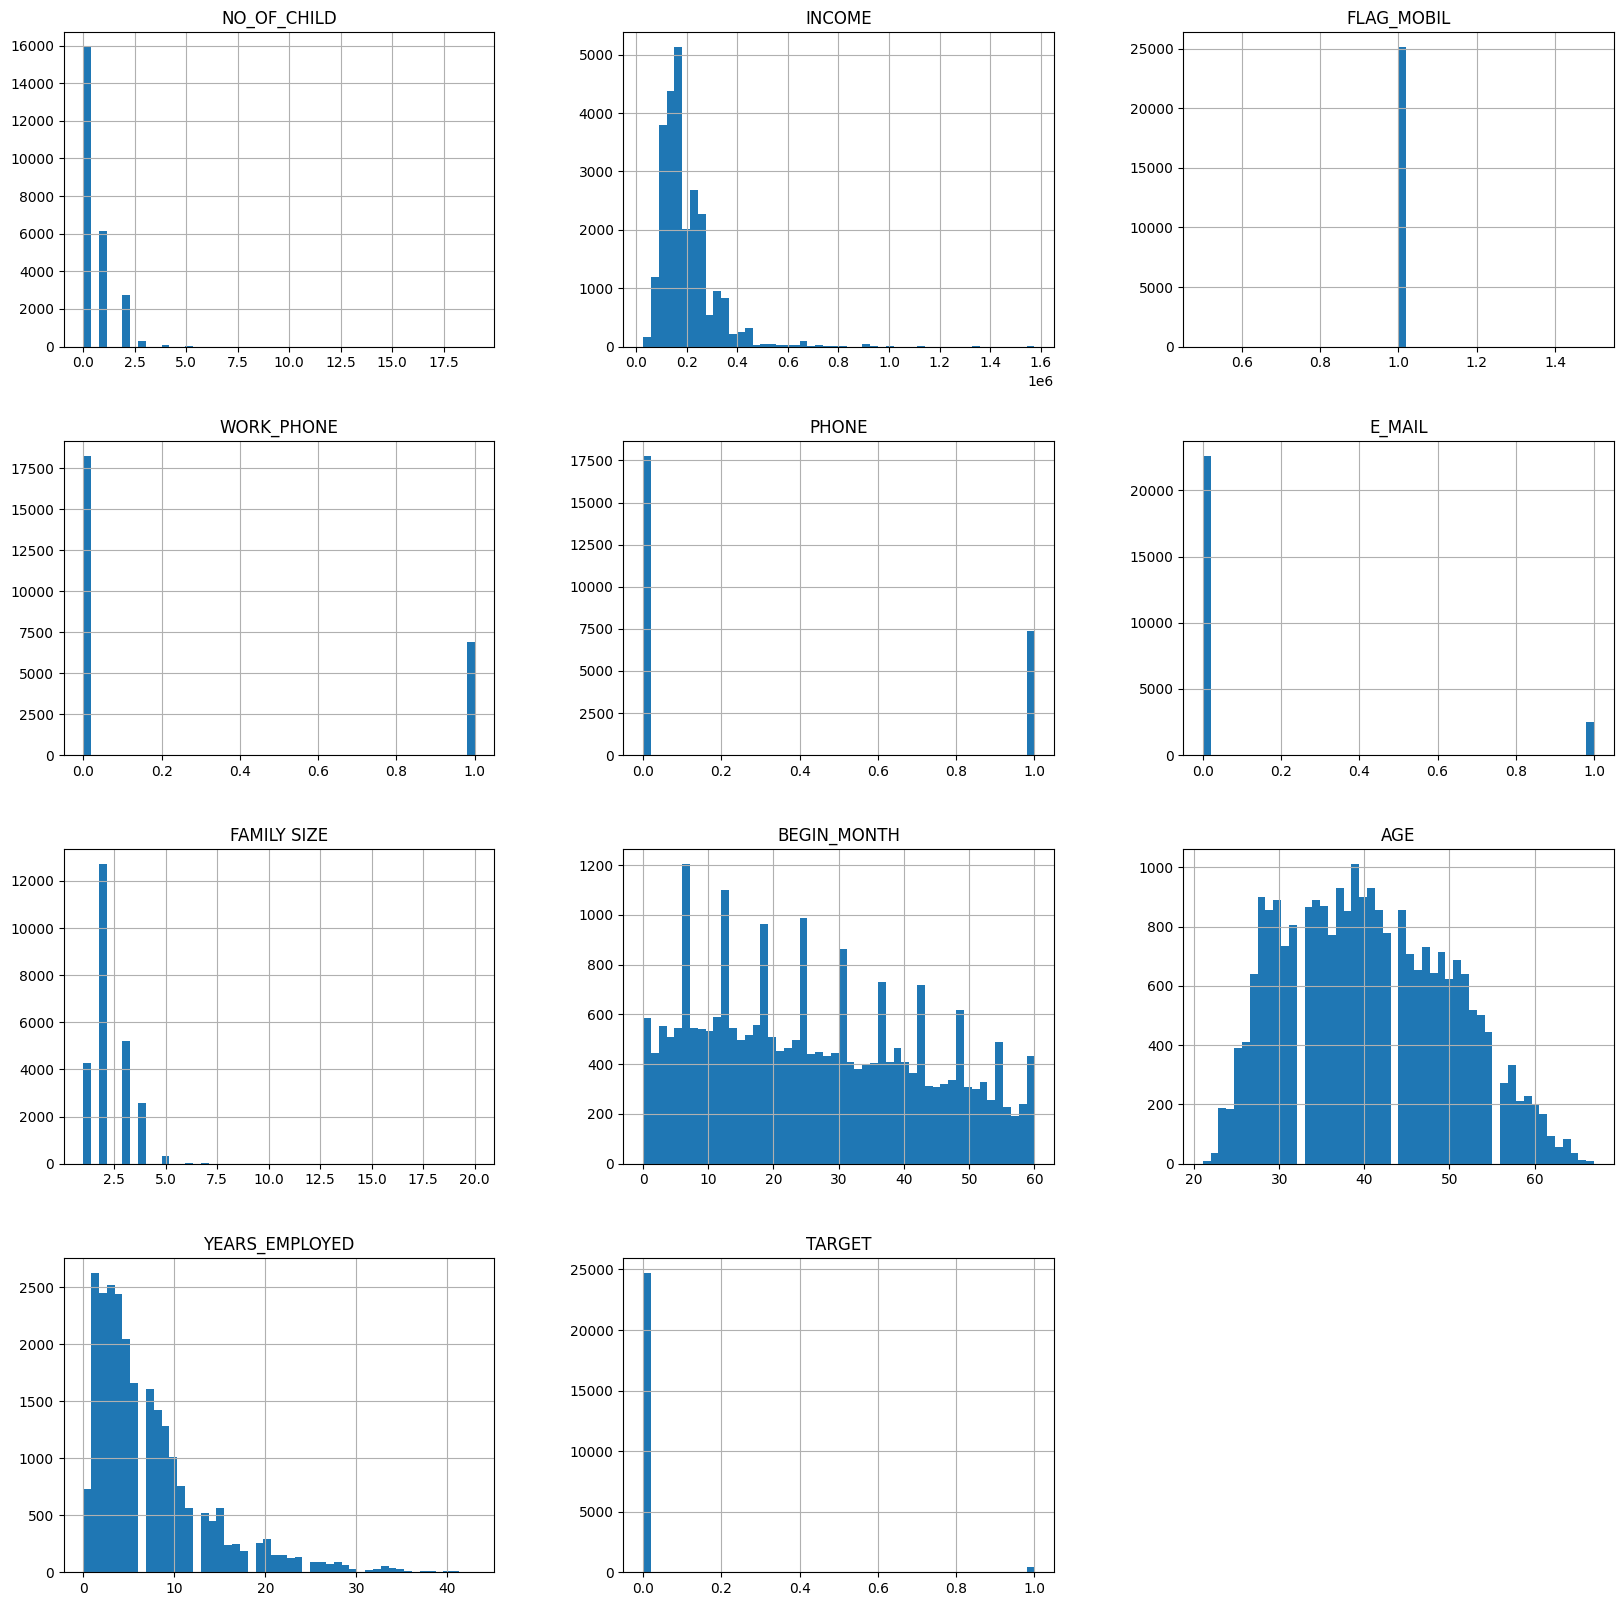

In [4]:
#ToDo: Show histogram of dataframe
df = df.drop(columns=['Unnamed: 0', 'ID'], errors='ignore') # Uneccessary columns
df.hist(figsize=(20, 20), bins=50)
plt.show()

## Data Analysis

In [5]:
# Data analysis
# Todo: analyze your data here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  object 
 1   CAR             25134 non-null  object 
 2   REALITY         25134 non-null  object 
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

In [6]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [7]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(2938)

In [8]:
df.describe().round(2)

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.00,25134.00,25134.0,25134.00,25134.00,25134.0,25134.00,25134.00,25134.00,25134.00,25134.00
mean,0.51,194833.85,1.0,0.27,0.29,0.1,2.29,26.12,40.54,7.20,0.02
std,0.79,104510.99,0.0,0.45,0.46,0.3,0.95,16.44,9.56,6.41,0.13
min,0.00,27000.00,1.0,0.00,0.00,0.0,1.00,0.00,21.00,0.00,0.00
25%,0.00,135000.00,1.0,0.00,0.00,0.0,2.00,12.00,33.00,3.00,0.00
50%,0.00,180000.00,1.0,0.00,0.00,0.0,2.00,24.00,40.00,5.00,0.00
75%,1.00,225000.00,1.0,1.00,1.00,0.0,3.00,39.00,48.00,10.00,0.00
max,19.00,1575000.00,1.0,1.00,1.00,1.0,20.00,60.00,67.00,43.00,1.00


Unique values in GENDER: ['M' 'F']
Unique values in CAR: ['Y' 'N']
Unique values in REALITY: ['Y' 'N']
Unique values in INCOME_TYPE: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
Unique values in EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in FAMILY_TYPE: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique values in HOUSE_TYPE: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


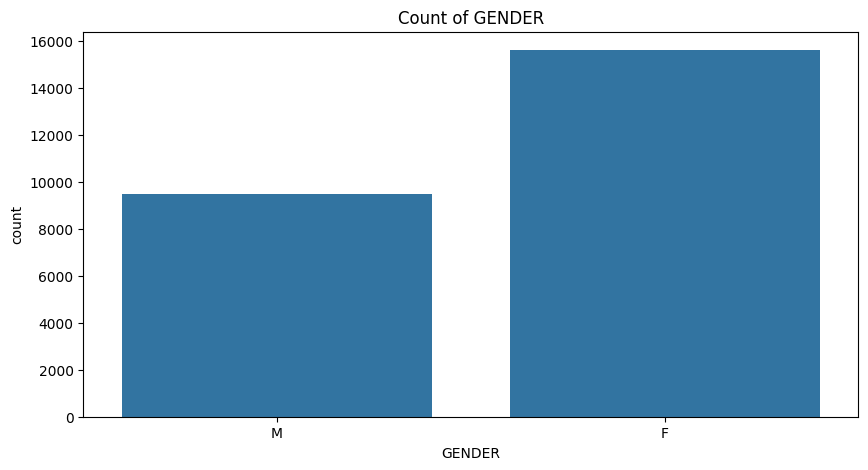

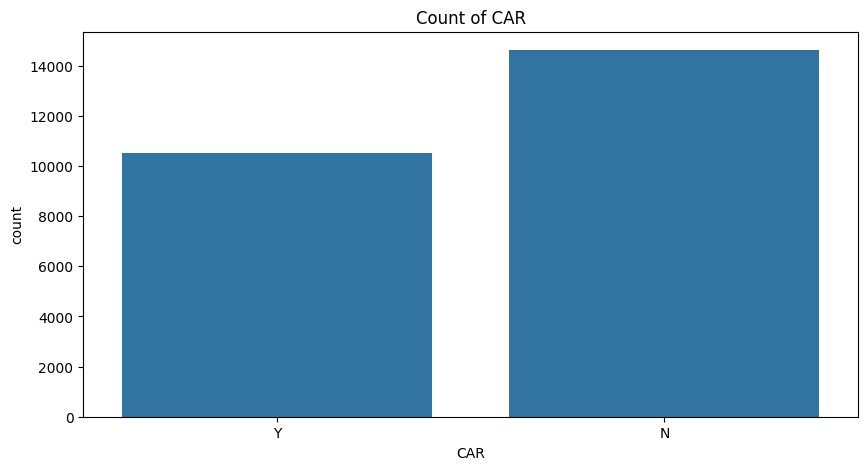

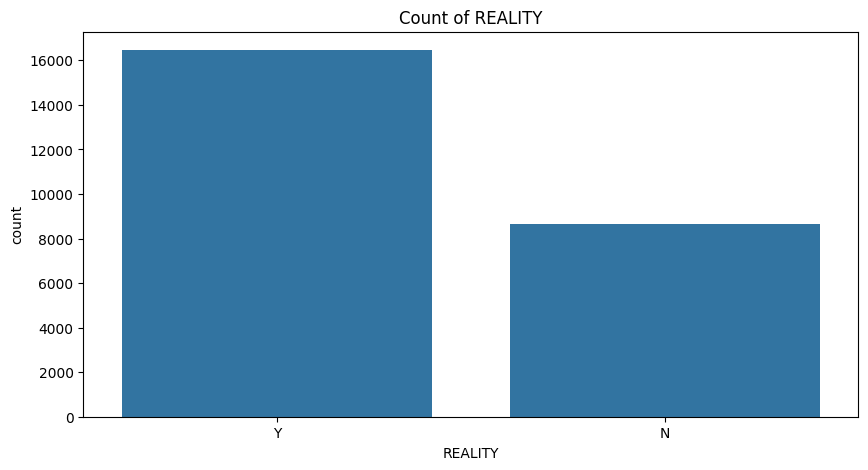

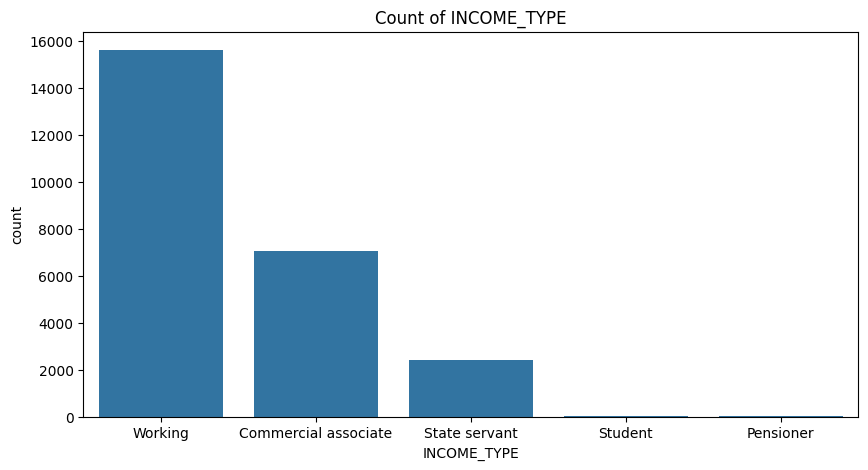

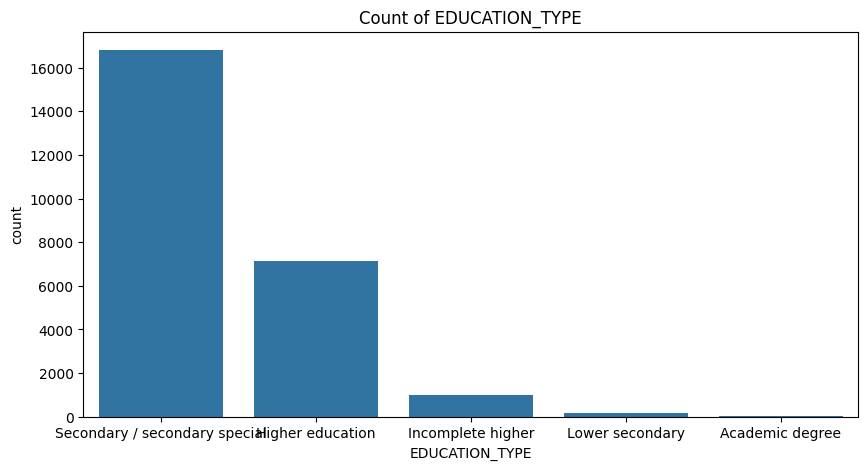

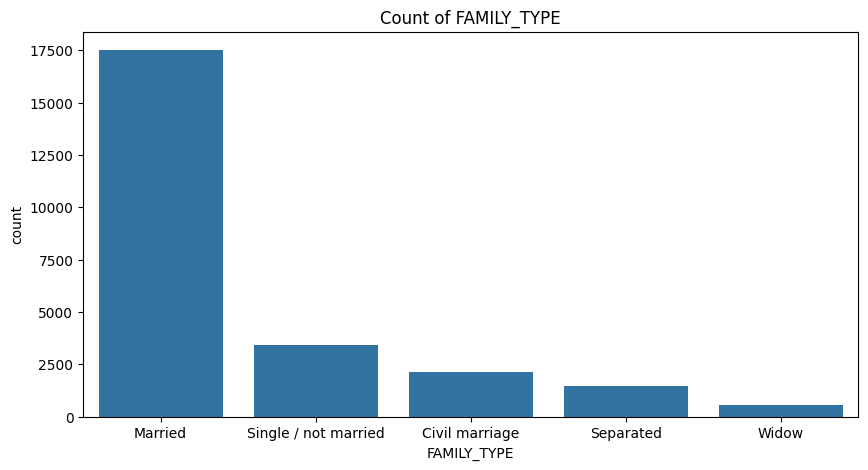

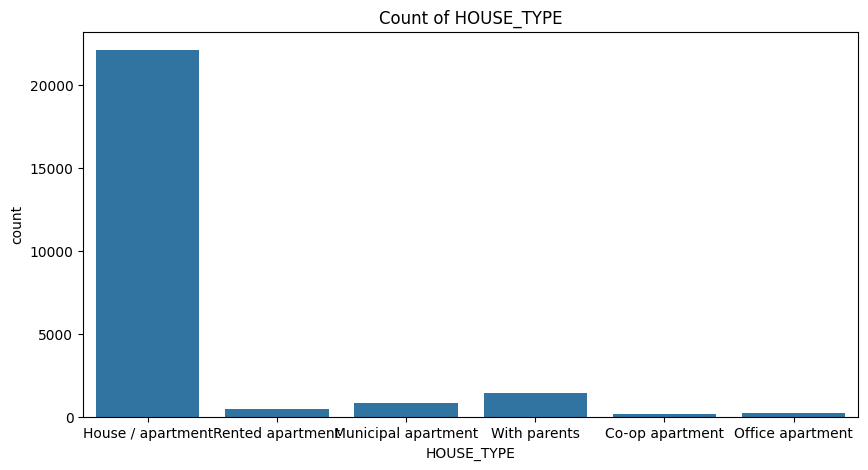

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
for i in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=i, data=df)
    plt.title(f"Count of {i}")
    plt.show()

In [10]:
# Percentage distribution of TARGET
print((df['TARGET']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .astype(str) + " %"))

TARGET
0    98.32 %
1     1.68 %
Name: proportion, dtype: object


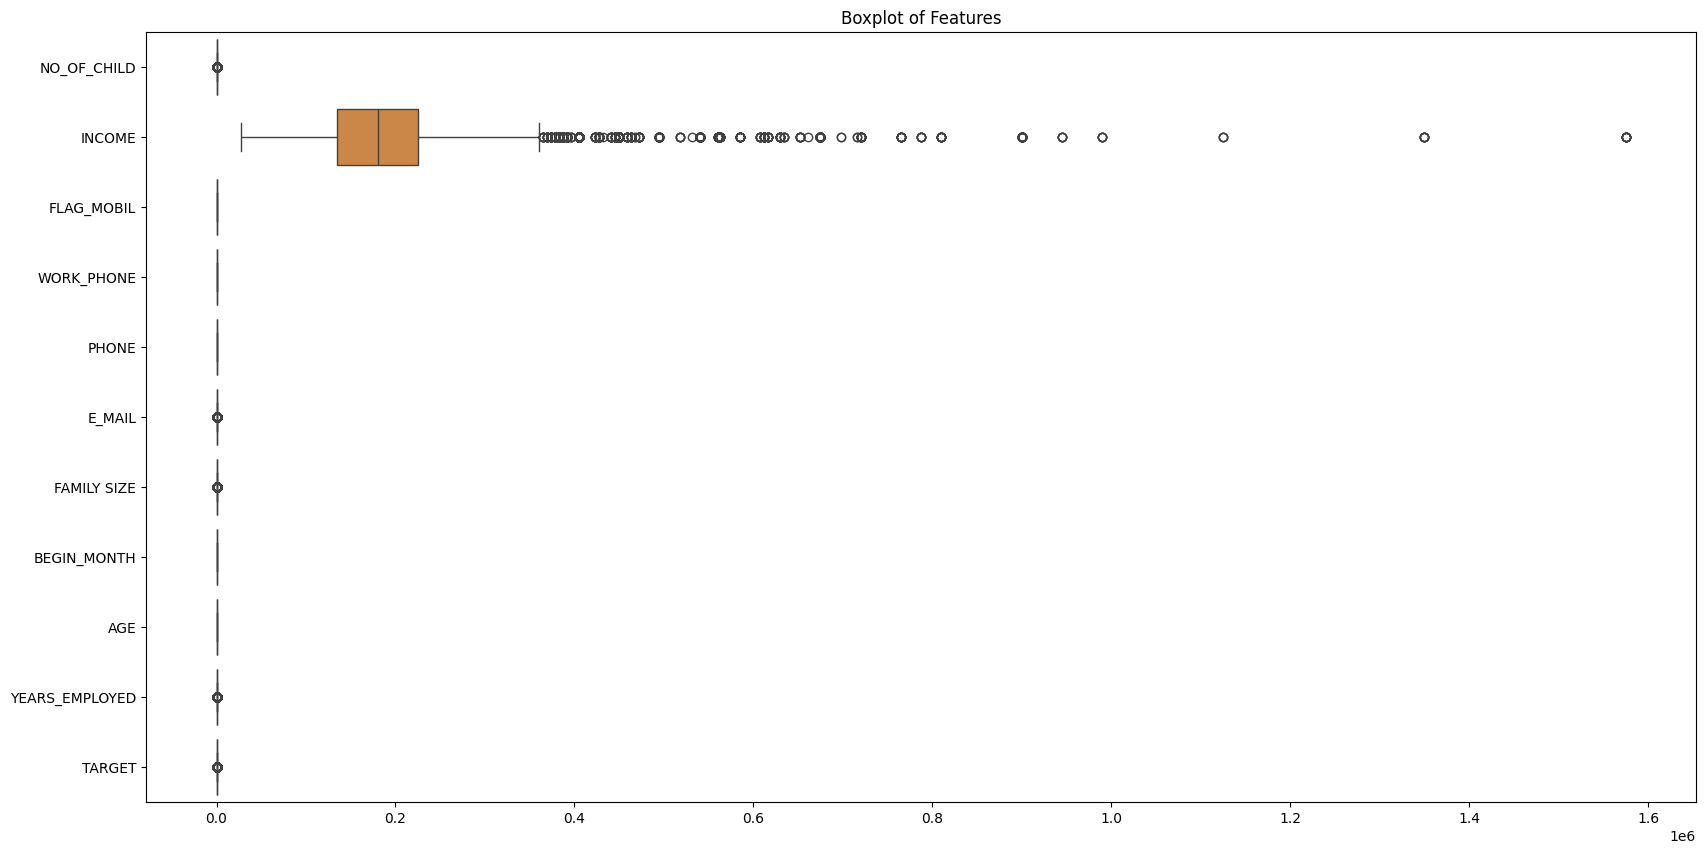

In [11]:
# Plot outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of Features")
plt.show()

In [12]:
df[df['TARGET'] == 1].describe().round(4)

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,422.0000,422.0000,422.0,422.0000,422.0000,422.0000,422.0000,422.0000,422.0000,422.0000,422.0
mean,0.5071,200056.1481,1.0,0.2938,0.3033,0.1019,2.2536,33.7583,39.9597,5.5664,1.0
std,0.7911,102783.0381,0.0,0.4561,0.4602,0.3029,0.9721,15.6078,9.5470,5.1968,0.0
min,0.0000,36000.0000,1.0,0.0000,0.0000,0.0000,1.0000,2.0000,22.0000,0.0000,1.0
25%,0.0000,135000.0000,1.0,0.0000,0.0000,0.0000,2.0000,21.0000,31.0000,2.0000,1.0
50%,0.0000,180000.0000,1.0,0.0000,0.0000,0.0000,2.0000,35.0000,40.0000,4.0000,1.0
75%,1.0000,247500.0000,1.0,1.0000,1.0000,0.0000,3.0000,47.0000,48.0000,8.0000,1.0
max,4.0000,900000.0000,1.0,1.0000,1.0000,1.0000,6.0000,60.0000,62.0000,29.0000,1.0


In [13]:
df[df['TARGET'] == 0].describe().round(4)

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,24712.0000,2.471200e+04,24712.0,24712.0000,24712.0000,24712.0000,24712.0000,24712.0000,24712.0000,24712.0000,24712.0
mean,0.5124,1.947447e+05,1.0,0.2735,0.2926,0.1006,2.2948,25.9902,40.5460,7.2321,0.0
std,0.7877,1.045400e+05,0.0,0.4457,0.4550,0.3009,0.9472,16.4230,9.5596,6.4295,0.0
min,0.0000,2.700000e+04,1.0,0.0000,0.0000,0.0000,1.0000,0.0000,21.0000,0.0000,0.0
25%,0.0000,1.350000e+05,1.0,0.0000,0.0000,0.0000,2.0000,12.0000,33.0000,3.0000,0.0
50%,0.0000,1.800000e+05,1.0,0.0000,0.0000,0.0000,2.0000,24.0000,40.0000,5.0000,0.0
75%,1.0000,2.250000e+05,1.0,1.0000,1.0000,0.0000,3.0000,39.0000,48.0000,10.0000,0.0
max,19.0000,1.575000e+06,1.0,1.0000,1.0000,1.0000,20.0000,60.0000,67.0000,43.0000,0.0


## Preprocessing

In [14]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop_duplicates() # Remove duplicate rows

    # Replace outliers in 'INCOME' column based on 'INCOME' column with median
    # Xử lý cho TARGET = 0
    q1_0 = df[df['TARGET'] == 0]['INCOME'].quantile(0.25)
    q3_0 = df[df['TARGET'] == 0]['INCOME'].quantile(0.75)
    iqr_0 = q3_0 - q1_0
    low_0 = q1_0 - 1.5 * iqr_0
    high_0 = q3_0 + 1.5 * iqr_0
    median_0 = df[df['TARGET'] == 0]['INCOME'].median()

    df.loc[(df['TARGET'] == 0) & ((df['INCOME'] < low_0) | (df['INCOME'] > high_0)), 'INCOME'] = median_0

    # TARGET = 1 tương tự:
    q1_1 = df[df['TARGET'] == 1]['INCOME'].quantile(0.25)
    q3_1 = df[df['TARGET'] == 1]['INCOME'].quantile(0.75)
    iqr_1 = q3_1 - q1_1
    low_1 = q1_1 - 1.5 * iqr_1
    high_1 = q3_1 + 1.5 * iqr_1
    median_1 = df[df['TARGET'] == 1]['INCOME'].median()

    df.loc[(df['TARGET'] == 1) & ((df['INCOME'] < low_1) | (df['INCOME'] > high_1)), 'INCOME'] = median_1

    from sklearn.preprocessing import OrdinalEncoder
    encoder = OrdinalEncoder()
    binary_cols = ['GENDER', 'CAR', 'REALITY']
    df[binary_cols] = encoder.fit_transform(df[binary_cols])

    df = pd.get_dummies(df, columns=['INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE'], drop_first=True)

    return df

In [15]:
df = preprocessing_data(df.copy())

## Feature Engineering

<Axes: >

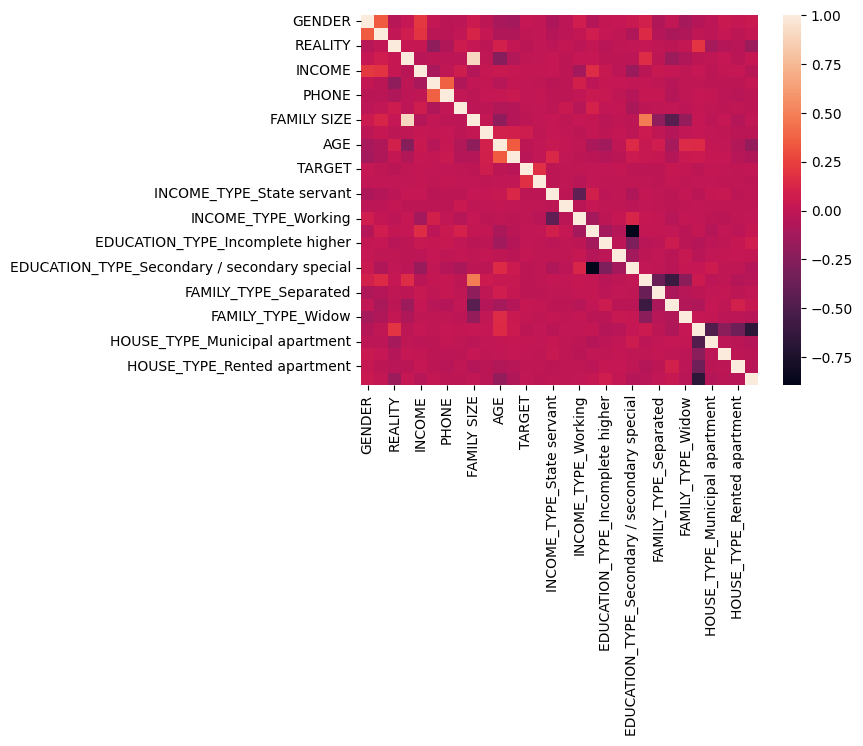

In [16]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.drop(columns=['FLAG_MOBIL'], errors='ignore') # Drop FLAG_MOBIL as it is constant

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

df = apply_feature_engineering(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [17]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=['TARGET']) # Todo: Select features
    y = df['TARGET']                # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [18]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX , trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    param = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 20}],
    'fit_intercept': [True],
    'intercept_scaling': [1]
    }
    grid_search = GridSearchCV(LogisticRegression(), param, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(
        MinMaxScaler(),
        grid_search
    )
    # Todo: fit your model with X, y
    model.fit(X, y)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

    return model

def calculate_performance(y_true, y_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy Score:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Precision Score:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall Score:", recall_score(y_true, y_pred, average='weighted'))
    # Calculate main score
    main_score = f1_score(y_true, y_pred, average='weighted')
    print("Main Score (F1 Score):", main_score)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'C': 10, 'class_weight': {0: 1, 1: 5}, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.9743501580920435
Confusion Matrix:
[[6539    0]
 [ 119    1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6539
         1.0       1.00      0.01      0.02       120

    accuracy                           0.98      6659
   macro avg       0.99      0.50      0.50      6659
weighted avg       0.98      0.98      0.97      6659

Accuracy Score: 0.9821294488661961
F1 Score: 0.9734224349792281
Precision Score: 0.9824488534298674
Recall Score: 0.9821294488661961
Main Score (F1 Score): 0.9734224349792281


0.9734224349792281

In [20]:
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    param = {
        'hidden_layer_sizes': [(100,), (50, 50)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    }
    grid_search = GridSearchCV(MLPClassifier(), param, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(
        MinMaxScaler(),
        grid_search
    )
    
    # Todo: fit your model with X, y
    model.fit(X, y)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

    return model

In [21]:
model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score:  0.975392808918021
Confusion Matrix:
[[6516   23]
 [ 108   12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6539
         1.0       0.34      0.10      0.15       120

    accuracy                           0.98      6659
   macro avg       0.66      0.55      0.57      6659
weighted avg       0.97      0.98      0.97      6659

Accuracy Score: 0.9803273764829554
F1 Score: 0.9749967879637371
Precision Score: 0.9721472783763441
Recall Score: 0.9803273764829554
Main Score (F1 Score): 0.9749967879637371


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9749967879637371

In [22]:
from imblearn.over_sampling import SMOTE

# Over-sampling with SMOTE
trainX_resampled, trainY_resampled = SMOTE(random_state=RANDOM_STATE, k_neighbors=10).fit_resample(trainX, trainY)

In [23]:
model_resampled = build_model(trainX_resampled, trainY_resampled)
# Compare on resampled dataset
pred_resampled = model_resampled.predict(testX)
calculate_performance(testY, pred_resampled)  # Todo Input

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score:  0.9732395717262976
Confusion Matrix:
[[6295  244]
 [  91   29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      6539
         1.0       0.11      0.24      0.15       120

    accuracy                           0.95      6659
   macro avg       0.55      0.60      0.56      6659
weighted avg       0.97      0.95      0.96      6659

Accuracy Score: 0.949692145967863
F1 Score: 0.9591871359610026
Precision Score: 0.9699004377123567
Recall Score: 0.949692145967863
Main Score (F1 Score): 0.9591871359610026


0.9591871359610026

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return  "6. " \
            "Other conclusion: "\
            "Bộ dữ liệu mất cân bằng giữa các lớp, với lớp 'TARGET' = 1 chiếm hơn 98% dữ liệu. " \
            "Do lớp 1 quá ít nên việc dự đoán lớp này sẽ khó khăn hơn. " \
            "Thay thế outliers trong cột 'INCOME' bằng giá trị trung vị của lớp tương ứng để giảm ảnh hưởng của các giá trị ngoại lai. " \
            "Bỏ cột 'FLAG_MOBIL' vì cột này có giá trị cố định. " \
            "Chọn mô hình chính là MLPClassifier với các tham số hidden_layer_sizes, activation, solver, learning_rate" \
            "Độ chính xác của lớp 0 rất cao nhưng độ chính xác của lớp 1 rất thấp. " \
            "Vì vậy nên cần áp dụng các kỹ thuật cân bằng dữ liệu như SMOTE để tạo ra các mẫu giả mạo cho lớp ít xuất hiện. " \
            "Sau khi áp dụng SMOTE, độ chính xác của việc dự đoán lớp 1 có chút cải thiện nhưng không đáng kể do vẫn còn thiếu nhiều mẫu thực tế. " \
            "Cần thu thập thêm dữ liệu thực tế cho lớp 1 để cho cân bằng bộ dữ liệu. "